# Error

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Roundoff error

### Example: Simple arithmetics

In [399]:
print((0.1 + 0.2) == 0.3)

False


In [400]:
print(0.1 + 0.2)
print(0.3)

0.30000000000000004
0.3


In [401]:
print("%1.30f"% (0.1))
print("%1.30f"% (0.2))
print("%1.30f"% (0.3))
print("%1.30f"% (0.1 + 0.2))

0.100000000000000005551115123126
0.200000000000000011102230246252
0.299999999999999988897769753748
0.300000000000000044408920985006


### Example: Cumulation of error

In [410]:
s = 0
for i in range(0, 10):
    s += 0.1

p = 0.1 * 10

print(s)
print(p)

0.9999999999999999
1.0


### Access to IEEE Numbers

In [598]:
print(np.finfo(np.float16));
print(np.finfo(np.float32));
print(np.finfo(np.float64));

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

### Example: Function evaluation

Text(0,0.5,'f (x)')

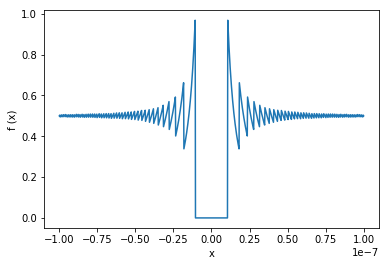

In [609]:
def function(x):
    return (1.0 - np.cos(x)) / x**2

x = np.linspace(-1e-7, 1e-7, 1000)

fig, ax = plt.subplots()
ax.plot(x, function(x))
ax.set_xlabel("x")
ax.set_ylabel("f (x)")

## Truncation error

### Example: Taylor series

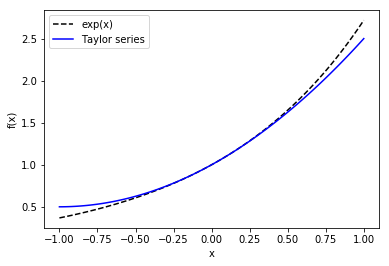

In [393]:
x = np.linspace(-1, 1, 100)

def exp_taylor(x):
    return 1.0 + x + x**2 / 2.0

fig, ax = plt.subplots()

ax.plot(x, np.exp(x), color="black", linestyle="--", label="exp(x)")
ax.plot(x, exp_taylor(x), color="blue", label="Taylor series")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

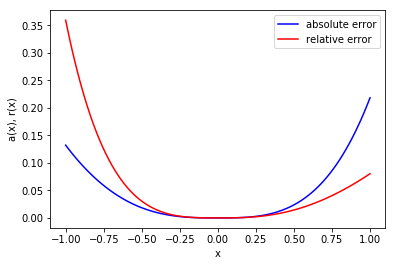

In [397]:
fig, ax = plt.subplots()

ax.plot(x, np.abs(np.exp(x) - exp_taylor(x)), color="blue", label="absolute error")
ax.plot(x, np.abs(np.exp(x) - exp_taylor(x)) / np.exp(x), color="red", label="relative error")
ax.set_xlabel("x")
ax.set_ylabel("a(x), r(x)")
ax.legend()

## Combination of errors

### Example: Finite differences

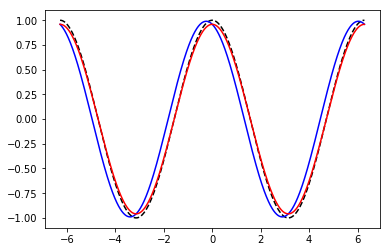

In [264]:
def forward_diff(f, x, delta_x):
    return (f(x + delta_x) - f(x)) / delta_x

def central_diff(f, x, delta_x):
    return (f(x + delta_x) - f(x - delta_x)) / (2.0 * delta_x)

x = np.linspace(-2.0 * np.pi, 2.0 * np.pi, 1000)
delta_x = 0.5

fig, ax = plt.subplots()
ax.plot(x, np.cos(x), color="black", linestyle='--')
ax.plot(x, forward_diff(np.sin, x, delta_x), color="blue")
ax.plot(x, central_diff(np.sin, x, delta_x), color="red")

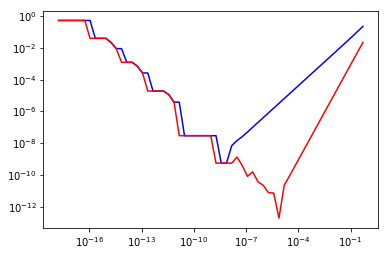

In [348]:
def forward_error(f, x, delta_x, true_value):
    return np.abs(forward_diff(f, x, delta_x) - true_value) 

def central_error(f, x, delta_x, true_value):
    return np.abs(central_diff(f, x, delta_x) - true_value)

x = 1.0
delta_x = np.array([2.0**(-n) for n in range(1, 60)]);

fig, ax = plt.subplots()
ax.loglog(delta_x, forward_error(np.sin, x, delta_x, np.cos(x)), color="blue")
ax.loglog(delta_x, central_error(np.sin, x, delta_x, np.cos(x)), color="red")

## Numerical stability

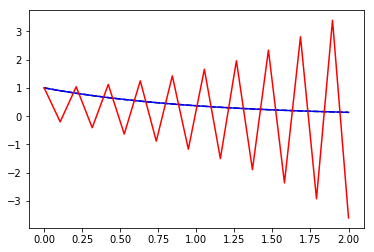

In [589]:
T = 2
delta_t = 0.1
N = int(T / delta_t)
t = np.linspace(0, T, N)

v_1 = np.linspace(0, T, N)
v_1[0] = 1.0
for i in range(1, N):
    v_1[i] = v_1[i-1] * (1.0 - delta_t) 
    
v_2 = np.linspace(0, T, N)
v_2[0] = 1.0
v_2[1] = -2.0 * v_2[0] * delta_t
for i in range(1, N-1):
    v_2[i+1] = -2.0 * v_2[i] * delta_t + v_2[i-1] 

fig, ax = plt.subplots()
ax.plot(t, np.exp(-t), color="black", linestyle="--")
ax.plot(t, v_1, color="blue")
ax.plot(t, v_2, color="red")